# Numerical Optimization Course Homework #1 - Opal Issan.

### Due: Sept 18th, 2020. 


# Question #1 

##### Question: 
Program the steepest descent and Newton algorithms using the backtracking line search. Use them to minimize the Rosenbrock function:

$f(\bar x) = 100{(x_{2} − {x_{1}}^{2})}^{2} + {(1 − x_{1})}^{2}$


Set the initial step length α_{0} = 1 and report the step length used by each method at each iteration. First try the initial point

${\bar x{0}}^{T} = [1.2, 1.2]$

and then the more difficult point

${\bar x{0}}^{T} = [-1.2, 1]$

Suggested values: 

α = 1, 
ρ = 0.5,
c = 10−4


Stop when: 

$|f(\bar x_{k})| < 10−8 $, 
or $||∇f( \bar x_{k})|| < 10−8$


You should hand in (i) your code (ii) the first 6 and last 6 values of $\bar x_{k}$ obtained from your program for steepest descent and
Newton algorithms and (iii) determine the minimizer of the Rosenbrock function x∗.

##### Answer: 
The 1st Wolfe conditions: 
$ f (\bar x_{k} + \alpha \bar p_{k}) \leq f(\bar x_{k}) + c_{1} \alpha \bar p_{k}^{T} ∇f( \bar x_{k})$


The gradient of the Rosenbrock function:


gradient: 
$∇ f(\bar x) = [\frac{\partial f}{\partial x_{1}} \frac{\partial f}{\partial x_{2}}]^{T} = [-400x_{2}x_{1} + 400x_{1}^{3} -2 + 2x_{1} , 200x_{2} - 200x_{1}^2]^{T}$

Hessian:
$∇^{2} f(\bar x) = 
\begin{bmatrix}
-400x_{2} + 1200x_{1}^{2} + 2 & -400x_{1}\\
-400x_{1} & 200 - 400x_{2}
\end{bmatrix}$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 5] # default fig size.

In [2]:
def rosenbrock_fun(x1, x2):
    """ This function returns the output of the Rosenbrock function."""
    return 100*((x2 - x1**2)**2) + (1 - x1)**2

In [3]:
def rosenbrock_gradient(x1, x2):
    """ return [df/dx1 df/dx2]"""
    dfx1 = -400*x2*x1 + 400*(x1**3) - 2 + 2*x1
    dfx2 = 200*x2 - 200*(x1**2)
    return np.array([dfx1, dfx2])

In [4]:
def rosenbrock_hessian(x1, x2):
    """ return [d2f/dx1^2   d2f/dx1dx2
                d2f/dx1dx2  d2f/dx2^2]"""
    h = np.zeros((2, 2))
    h[0, 0] = -400*x2 + 1200*x1**2 + 2
    h[0, 1] = -400*x1
    h[1, 0] = -400*x1
    h[1, 1] = 200 
    return h 

In [5]:
def pk_steepest_descent(gradient):
    """ search direction for steepest decent."""
    return np.array(-1*gradient/np.linalg.norm(gradient))

In [6]:
def pk_newton(gradient, hessian):
    """ search direction for Newton's method."""
    h_inv = np.linalg.inv(hessian)
    return -np.matmul(h_inv, gradient)

In [7]:
# Plot the surface of rosenbrock_fun
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
f = np.zeros((len(x1), len(x2)))
for ii in range(len(x1)):
    for jj in range(len(x2)):
        f[ii, jj] = rosenbrock_fun(x1[ii], x2[jj])

<IPython.core.display.Javascript object>


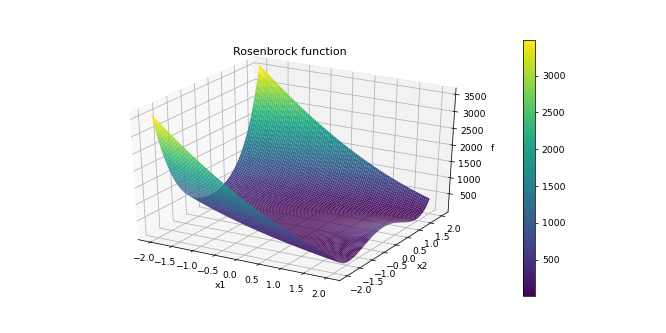

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
im = ax.plot_surface(X1, X2, f, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
fig.colorbar(im) 
_ = ax.set_title('Rosenbrock function')

_ = ax.set_xlabel('x1')
_ = ax.set_ylabel('x2')
_ = ax.set_zlabel('f')

<IPython.core.display.Javascript object>


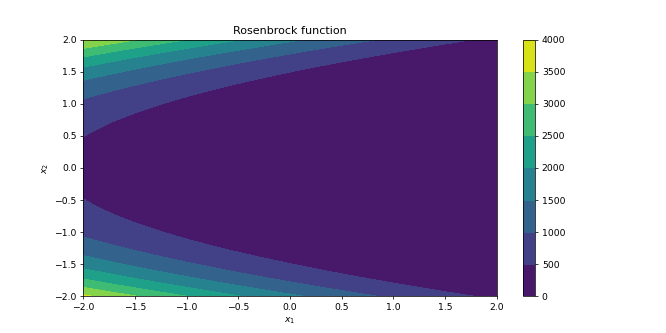

Text(0, 0.5, '$x_{2}$')

In [15]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X1, X2, f)
fig.colorbar(cp) 
ax.set_title('Rosenbrock function')
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')

In [16]:
def find_local_minimum(x0, c1, alpha, p, tol=1e-8, print_num=None, method="sd", save_xk=False):
    """ Find the local minimum point x* using backtracking line search that will satisfy Armijo-Goldstein inequality.
    The avilable methods: Newton and Steepest Descent. Default is Steepest descent. 
    x0 - initial guess for x*. 
    c1 - the slope of Armijo-Goldstein line. 
    alpha - initial step size. 
    p - modify alpha scaler. 
    tol - tolerence. the iterative method will stop when ||gradient|| < tol"""
    
    xk = x0
    k = 0 # iteration number
    alpha_original = alpha
    
    if save_xk:
        xk_arr = np.array([xk])
    
    while (rosenbrock_fun(xk[0], xk[1]) >= tol or np.linalg.norm(rosenbrock_gradient(xk[0], xk[1])) >= tol):
        """ find the next iteration xk+1"""
        gradient = rosenbrock_gradient(xk[0], xk[1])
        
        if method == "sd":
            pk = pk_steepest_descent(gradient)
            
        if method == "newton":
            hessian = rosenbrock_hessian(xk[0], xk[1])
            pk = pk_newton(gradient, hessian)
        
        if print_num is not None:
            if 0 <= k <= 6:
                if k == 0:
                    print("***The first 6 iterations:*** \n")
                print("Iteration #" + str(k) + ", x" + str(k) + " = " + str(xk))
                print("||gradient|| = " + str(np.linalg.norm(gradient)) + "\n")
            if print_num-6<=k<=print_num and k>6:
                if k == print_num-6 or k==7:
                    print("***The last 6 iterations:*** \n")
                print("Iteration #" + str(k) + ", x" + str(k) + " = " + str(xk))
                print("||gradient|| = " + str(np.linalg.norm(gradient)) + "\n")
            

        xk_next = xk + alpha*pk
        
        while rosenbrock_fun(xk_next[0], xk_next[1]) > rosenbrock_fun(xk[0], xk[1]) + c1*alpha*np.dot(pk, gradient):
            """ find a step size that will satisfy Armijo-Goldstein inequality. Modify alpha. """
            alpha = p * alpha
            xk_next = xk + alpha*pk
        
        xk = xk_next
        alpha = alpha_original
        k = k + 1
        
        if save_xk:
            xk_arr = np.append(xk_arr, [xk])
            
    if save_xk:
        return xk, k, xk_arr
    
    return xk, k

#### The steepest descent method applied to x0 = [1.2, 1.2]

In [17]:
find_local_minimum(x0=[1.2, 1.2], c1=1e-4, alpha=1, p=0.5, tol=1e-8, print_num=17186, method="sd")

***The first 6 iterations:*** 

Iteration #0, x0 = [1.2, 1.2]
||gradient|| = 125.16932531574973

Iteration #1, x1 = [1.08455638 1.24793507]
||gradient|| = 34.08481472685194

Iteration #2, x2 = [1.11290849 1.23479275]
||gradient|| = 2.049181825510216

Iteration #3, x3 = [1.11109258 1.2355119 ]
||gradient|| = 0.29211980595892933

Iteration #4, x4 = [1.11145306 1.23518255]
||gradient|| = 0.2889979970139873

Iteration #5, x5 = [1.11096726 1.23523167]
||gradient|| = 0.2914539553155964

Iteration #6, x6 = [1.1113276  1.23490216]
||gradient|| = 0.2894351030962934

***The last 6 iterations:*** 

Iteration #17180, x17180 = [1.         1.00000001]
||gradient|| = 2.332025020867205e-07

Iteration #17181, x17181 = [1.         1.00000001]
||gradient|| = 2.3320414840567556e-07

Iteration #17182, x17182 = [1.         1.00000001]
||gradient|| = 2.3320256846630995e-07

Iteration #17183, x17183 = [1.         1.00000001]
||gradient|| = 2.3320399887584921e-07

Iteration #17184, x17184 = [1.         1.00000

(array([1.        , 1.00000001]), 17187)

#### The steepest descent method applied to x0 = [-1.2, 1]

In [18]:
find_local_minimum(x0=[-1.2, 1], c1=1e-4, alpha=1, tol=1e-8, p=0.5, print_num=17842, method='sd')

***The first 6 iterations:*** 

Iteration #0, x0 = [-1.2, 1]
||gradient|| = 232.86768775422658

Iteration #1, x1 = [-0.96853809  1.09447425]
||gradient|| = 64.71980625183701

Iteration #2, x2 = [-1.07796721  1.0340568 ]
||gradient|| = 64.61312999125856

Iteration #3, x3 = [-1.02057843  1.05881116]
||gradient|| = 4.5644436700130075

Iteration #4, x4 = [-1.02570126  1.0529127 ]
||gradient|| = 3.7067132779867835

Iteration #5, x5 = [-1.01789697  1.05255455]
||gradient|| = 4.228053061110654

Iteration #6, x6 = [-1.0228084   1.04647895]
||gradient|| = 3.9063297144112643

***The last 6 iterations:*** 

Iteration #17836, x17836 = [1.         0.99999999]
||gradient|| = 2.3320495864675882e-07

Iteration #17837, x17837 = [1.         0.99999999]
||gradient|| = 2.332017365374389e-07

Iteration #17838, x17838 = [1.         0.99999999]
||gradient|| = 2.3320496211913643e-07

Iteration #17839, x17839 = [1.         0.99999999]
||gradient|| = 2.332016459591387e-07

Iteration #17840, x17840 = [1.        

(array([1.        , 0.99999999]), 17842)

#### The Netwon's method applied to x0 = [1.2, 1.2]

In [19]:
find_local_minimum(x0=[1.2, 1.2], c1=1e-4, alpha=1, p=0.5, tol=1e-8, print_num=8, method="newton")

***The first 6 iterations:*** 

Iteration #0, x0 = [1.2, 1.2]
||gradient|| = 125.16932531574973

Iteration #1, x1 = [1.19591837 1.43020408]
||gradient|| = 0.39982008700559746

Iteration #2, x2 = [1.09828449 1.19668813]
||gradient|| = 4.784866047067419

Iteration #3, x3 = [1.06448816 1.13199285]
||gradient|| = 0.6563523212519193

Iteration #4, x4 = [1.01199212 1.02137221]
||gradient|| = 1.2658319322645815

Iteration #5, x5 = [1.00426109 1.00848056]
||gradient|| = 0.03465826066198764

Iteration #6, x6 = [1.00005033 1.00008294]
||gradient|| = 0.008019780399635829

***The last 6 iterations:*** 

Iteration #7, x7 = [1.00000018 1.00000035]
||gradient|| = 1.451947803492609e-06



(array([1., 1.]), 8)

#### The Newton's method applied to x0 = [-1.2, 1]

In [20]:
find_local_minimum(x0=[-1.2, 1], c1=1e-4, alpha=1, p=0.5, tol=1e-8, print_num=21, method="newton")

***The first 6 iterations:*** 

Iteration #0, x0 = [-1.2, 1]
||gradient|| = 232.86768775422658

Iteration #1, x1 = [-1.1752809   1.38067416]
||gradient|| = 4.639426214066643

Iteration #2, x2 = [-0.93298143  0.81121066]
||gradient|| = 28.550080477679483

Iteration #3, x3 = [-0.78254008  0.58973638]
||gradient|| = 11.571520864197485

Iteration #4, x4 = [-0.45999712  0.10756339]
||gradient|| = 30.3258945523671

Iteration #5, x5 = [-0.39304563  0.15000237]
||gradient|| = 3.6041022542230117

Iteration #6, x6 = [-0.20941191  0.00677013]
||gradient|| = 9.248418367874669

***The last 6 iterations:*** 

Iteration #15, x15 = [0.86349081 0.74193125]
||gradient|| = 1.2421077023115474

Iteration #16, x16 = [0.94207869 0.8813362 ]
||gradient|| = 2.533067361695095

Iteration #17, x17 = [0.96799182 0.93633667]
||gradient|| = 0.23758180511151408

Iteration #18, x18 = [0.99621031 0.9916387 ]
||gradient|| = 0.34827207835223944

Iteration #19, x19 = [0.99947938 0.99894834]
||gradient|| = 0.00387418729120

(array([1., 1.]), 21)

#### Hence, The minimizer of  the rosenbrock function is (1, 1)

# Question #2

##### Question:
Using the $x_{k}$ values you obtained in Problem 1 determine:

(i) the rate of convergence of the steepest descent algorithm.

(ii) the rate of convergence of the Newton algorithms.


You should show work to obtain full credit (show your calculations or your code if you computed it numerically).

##### Answer: 

First I will plot the change in $x_{k}$ with respect to k for Steepest Descent and Newton's method. 


$ || x_{k+1} - x_{*} || <= \gamma ||x_{k} - x_{*} ||^p$

Where gamma is the rate of convergence and p is the order of convergence.


Take the log of both sides:

$ \log (|| x_{k+1} - x_{*} ||) <= \log (\gamma ||x_{k} - x_{*} ||^p)$

$ \log (|| x_{k+1} - x_{*} ||) <= \log (\gamma) + \log(||x_{k} - x_{*} ||^p) $

$ \log (|| x_{k+1} - x_{*} ||) <= \log (\gamma) + p \log(||x_{k} - x_{*} ||) $

Now, we just need to linearly fit the results and find $p$ and $\gamma$

In [21]:
x_min_1, final_k_1, xk_arr_1 = find_local_minimum(x0=[-1.2, 1], c1=1e-4, alpha=1, p=0.5, tol=1e-10, print_num=None, method="sd", save_xk=True)

In [22]:
x_min_2, final_k_2, xk_arr_2 = find_local_minimum(x0=[-1.2, 1], c1=1e-4, alpha=1, p=0.5, tol=1e-10, print_num=None, method="newton", save_xk=True)

In [23]:
x_min = [1, 1]

roc_sp = np.zeros(final_k_1 - 1)
dx_sp = np.zeros(final_k_1 - 1)

roc_nw = np.zeros(final_k_2 - 1)
dx_nw = np.zeros(final_k_2 - 1)

for ii in range(final_k_1 - 1):
    dx_sp[ii] = np.linalg.norm(np.abs(xk_arr_1[2*ii: 2*(ii)+2] - x_min))

for jj in range(final_k_2 - 1):
    dx_nw[jj] = np.linalg.norm(np.abs(xk_arr_2[2*jj: 2*(jj)+2] - x_min))

In [24]:
roc_nw = dx_nw[1:]
dx_nw = dx_nw[:-1]

roc_sp = dx_sp[1:]
dx_sp = dx_sp[:-1]

In [25]:
# compute the linear regression fit. 
def best_fit_slope(x,y):
    """ return the slope of linear regression fit. """ 
    m = (((np.mean(x)*np.mean(y)) - np.mean(x*y)) / ((np.mean(x)**2) - np.mean(x**2)))
    return m


x1 = np.log10(dx_sp)
y1 = np.log10(roc_sp)
a1 = best_fit_slope(x1,y1)
b1 = np.mean(y1) - np.mean(x1)*a1



x2 = np.log10(dx_nw)
y2 = np.log10(roc_nw)
a2 = best_fit_slope(x2,y2)
b2 = np.mean(y2) - np.mean(x2)*a2


<IPython.core.display.Javascript object>


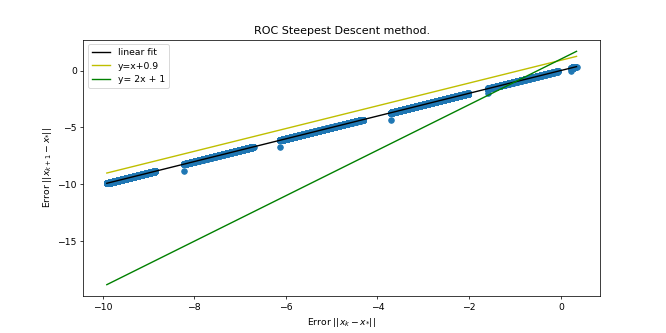

<IPython.core.display.Javascript object>


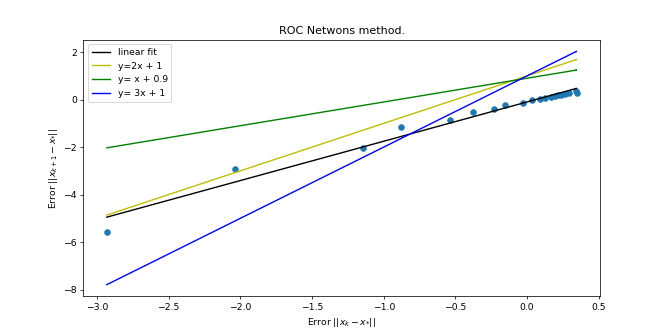

In [26]:
fig1, ax1 = plt.subplots(1, 1)
ax1.scatter(np.log10(dx_sp), np.log10(roc_sp))
ax1.plot(np.log10(dx_sp), np.log10(dx_sp)*a1 + b1, color='k', label="linear fit")
ax1.plot(np.log10(dx_sp), np.log10(dx_sp)*1 + 0.9, color='y', label="y=x+0.9")
ax1.plot(np.log10(dx_sp), np.log10(dx_sp)*2 + 1, color='g', label="y= 2x + 1")
ax1.set_title("ROC Steepest Descent method.")
ax1.set_xlabel("Error $||x_{k} - x_{*}||$ ")
ax1.set_ylabel("Error $||x_{k+1} - x_{*}||$")
ax1.legend()

fig2, ax2 = plt.subplots(1, 1)
ax2.scatter(np.log10(dx_nw), np.log10(roc_nw))
ax2.plot(np.log10(dx_nw), np.log10(dx_nw)*a2 + b2, color='k', label="linear fit")
ax2.plot(np.log10(dx_nw), np.log10(dx_nw)*2 + 1, color='y', label="y=2x + 1")
ax2.plot(np.log10(dx_nw), np.log10(dx_nw) + 0.9, color='g', label="y= x + 0.9")
ax2.plot(np.log10(dx_nw), np.log10(dx_nw)*3 + 1, color='b', label="y= 3x + 1")
ax2.set_title("ROC Netwons method.")
ax2.set_xlabel("Error $||x_{k} - x_{*}|| $ ")
ax2.set_ylabel("Error $||x_{k+1} - x_{*}||$ ")
ax2.legend()

plt.show()

In [27]:
gamma_sp = 10**b1
p_sp = a1

gamma_nw = 10**b2
p_nw = a2

In [28]:
print("The order of convergence of Steepest descent = ", p_sp)
print("Hence, steepest descent converges linearly!")
print("The rate of convergence of Steepest descent = ", gamma_sp)


print("\nThe order of convergence of Newton's method = ", p_nw)
print("Hence, steepest descent converges Quadradicly!")
print("The rate of convergence of Steepest descent = ", gamma_nw)

The order of convergence of Steepest descent =  0.999980858348032
Hence, steepest descent converges linearly!
The rate of convergence of Steepest descent =  0.9986488277363811

The order of convergence of Newton's method =  1.6555403401554172
Hence, steepest descent converges Quadradicly!
The rate of convergence of Steepest descent =  0.7986983574317725


# Question # 3

##### Question: 

Determine if the following function of two variables is convex. Create a contour plot of the function using a programming
language of your chioce:

$f(x,y) = 5 - 5x -2y + 2x^2 + 5xy + 6y^2$


##### Answer: 

gradient: 
$∇ f(x, y) = [\frac{\partial f}{\partial x} \frac{\partial f}{\partial y}]^{T} = [-5 + 10x + 5y, -2 + 5x + 12y]^{T}$

Hessian:
$∇^{2} f(x, y) = 
\begin{bmatrix}
\frac{\partial^{2} f}{\partial x^{2}} & \frac{\partial^{2} f}{\partial x \partial y}\\
\frac{\partial^{2} f}{\partial x \partial y} & \frac{\partial^{2} f}{\partial y^{2}}
\end{bmatrix} = 
\begin{bmatrix}
10 & 5\\
5 & 12
\end{bmatrix}
$

$f(x,y)$ is convex if and only if $∇^{2} f(x, y)$ is positive definite $\forall x \in R$.

Let, $X = [x_{1} y_{1}]^{T}$ be arbitrary. 

Then, $ X^{T}∇^{2} f(x, y)X = [x_{1} y_{1}] \begin{bmatrix}
10 & 5\\
5 & 12
\end{bmatrix} [x_{1} y_{1}]^{T} = x_{1} (10x_{1} + 5x_{2}) + x_{2} (5 + 12x_{2}) = 
10x_{1}^{2} + 10x_{1}x_{2} + 12x_{2}^{2} = 
(\sqrt{5} x_{2} + \sqrt x_{1})^{2} + 5x_{1}^{2} + 7x_{2}^{2} \geq 0 $

Therefore, 

f is convex.

In [29]:
def fun(x,y):
    return 5 - 5*x -2*y +2*x**2 + 5*x*y + 6*y**2

In [30]:
x_array = np.linspace(-500, 500, 100)
y_array = np.linspace(-500, 500, 100)
X, Y = np.meshgrid(x_array, y_array)
f_val = np.zeros((len(x_array), len(y_array)))

In [31]:
for ii in range(len(x_array)):
    for jj in range(len(y_array)):
        f_val[ii, jj] = fun(x_array[ii], y_array[jj])

<IPython.core.display.Javascript object>


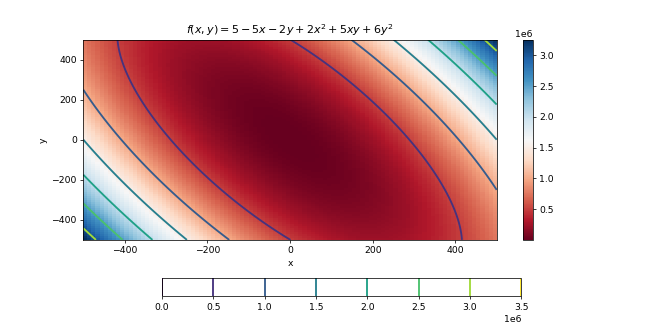

In [32]:
fig, ax = plt.subplots()
ax.set_title("$f(x,y) = 5 - 5x -2y + 2x^2 + 5xy + 6y^2$")
ax.set_ylabel("y")
ax.set_xlabel("x")

_ = im1 = ax.contour(x_array , y_array, f_val , linewidths=2)
_ = im2 = ax.pcolorfast(x_array, y_array, f_val , cmap="RdBu")
_ = fig.colorbar(im1, ax=ax, orientation="horizontal", fraction=0.07, anchor=(2,0.0))
_ = fig.colorbar(im2, ax=ax)

# Question 4

##### Question: 

(i) Show that the sequence $x_{k}= 1 + (0.5)^{2^{k}}$ is Q-quadratically convergent to 1.


(ii) Does the sequence $x_{k} = 1/k!$ converge Q-superlinearly? Q-quadratically?

(i) $x_{k}= 1 + (0.5)^{2^{k}}$. 

$\lim_{k \to +\infty} x_{k} = 1$

$x_{k}$ is Q-quadratically convergent to 1 if:
    
$\frac{||X_{k+1} - x_{*}||}{||x_{k} - x_{*}||^{2}} \leq 1$

Then, 


$\frac{||X_{k+1} - x_{*}||}{||x_{k} - x_{*}||^{2}}  = \frac{||1 + (0.5)^{2^{k+1}} -1||}{||1 + (0.5)^{2^{k}} - 1||^{2}} = 
\frac{||(0.5)^{2^{k+1}}||}{||(0.5)^{2^{k}}||^{2}} = \frac{||(0.5)^{2^{k+1}}||}{||(0.5)^{2^{k+1}}||} = 1 \leq 1$

(ii) $x_{k} = 1/k!$

$\lim_{k \to +\infty} x_{k} = 0$

$x_{k}$ is Q-quadratically convergent to 1 if:
    
$\frac{||X_{k+1} - x_{*}||}{||x_{k} - x_{*}||^{2}} \leq 1$

$x_{k}$ is Q-superlinearly convergent if:
    
$\lim_{k \to +\infty} \frac{||X_{k+1} - x_{*}||}{||x_{k} - x_{*}||^{2}} =0$


Now, I will show that $x_{k} = 1/k!$ is Q-superlinearly convergent.

$\lim_{k \to +\infty} \frac{||X_{k+1} - x_{*}||}{||x_{k} - x_{*}||} = \lim_{k \to +\infty} \frac{||1/(k+1)! - 0||}{||1/k! - 0||} = \lim_{k \to +\infty} \frac{||1/(k+1)!||}{||1/k!||} = \lim_{k \to +\infty} \frac{1}{k+1} = 0 $